In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [61]:
# Importing the data and renaming the columns

full_df = pd.read_csv('Plate006_Final.csv')
genes_df = pd.read_excel('Plate006Genes.xlsx', sheet_name='vertical')
grnas_df = pd.read_excel('Plate006gRNAs.xlsx', sheet_name='vertical')

full_df = full_df[['Count_soma', 'Math_AreaCoveredPerCell', 'Metadata_Well', 'Metadata_day', 'Mean_soma_ObjectSkeleton_NumberTrunks_NeuriteSkeleton']]
full_df.columns = ['Cells', 'AreaPerCell', 'Well', 'Day', 'AvgTrunks']
full_df

,Cells,AreaPerCell,Well,Day,AvgTrunks
0,78.0,9749.32,B02,1,3.564103
1,72.0,23098.79,B02,3,3.222222
2,61.0,45655.72,B02,5,3.131148
3,99.0,9290.29,B03,1,3.777778
4,88.0,27117.85,B03,3,2.920455
...,...,...,...,...,...
175,58.0,26049.31,G10,3,3.068966
176,53.0,46986.26,G10,5,3.113208
177,49.0,8724.22,G11,1,3.673469
178,46.0,25519.70,G11,3,3.608696


In [62]:
genes_df.columns

Index(['Well', 'Sample'], dtype='object')

In [63]:
genes_df.columns = ['Well', 'Gene']
grnas_df.columns = ['Well', 'grna']

In [64]:
# Adding the info about gene and grna onto the main data frame

full_df = full_df.merge(genes_df, how='left', on='Well')
full_df = full_df.merge(grnas_df, how='left', on='Well')
full_df

,Cells,AreaPerCell,Well,Day,AvgTrunks,Gene,grna
0,78.0,9749.32,B02,1,3.564103,NT,g2
1,72.0,23098.79,B02,3,3.222222,NT,g2
2,61.0,45655.72,B02,5,3.131148,NT,g2
3,99.0,9290.29,B03,1,3.777778,NT,g2
4,88.0,27117.85,B03,3,2.920455,NT,g2
...,...,...,...,...,...,...,...
175,58.0,26049.31,G10,3,3.068966,SETBP1,g3
176,53.0,46986.26,G10,5,3.113208,SETBP1,g3
177,49.0,8724.22,G11,1,3.673469,SETBP1,g3
178,46.0,25519.70,G11,3,3.608696,SETBP1,g3


In [65]:
# Collapsing the replicates and getting the mean for each
df_averaged = full_df.groupby(['Gene', 'grna', 'Day']).agg({'Cells': 'mean', 
                                                            'AreaPerCell': 'mean',
                                                            'AvgTrunks': 'mean'})
df_averaged

Cells  AreaPerCell  AvgTrunks
Gene   grna Day                               
MBD5   g1   1    191.0     8066.280   3.879959
            3    178.6    22268.156   3.503700
            5    157.2    39415.928   4.017839
       g2   1     87.4     7220.966   3.852985
            3     76.4    22589.962   3.250211
            5     65.2    38805.310   3.253089
       g3   1    216.6     7380.788   3.967810
            3    202.0    21835.352   3.581208
            5    175.8    40176.562   4.052631
MED12  g1   1    140.6     7537.494   3.669996
            3    135.8    24431.086   3.475010
            5    115.8    46329.962   3.712854
       g2   1    105.0     7854.084   3.468140
            3    101.6    26977.084   3.217662
            5     80.2    54621.664   3.608243
NT     g2   1     89.2     9515.426   3.561919
            3     81.0    25747.368   3.015311
            5     74.6    45651.484   3.383759
SETBP1 g1   1    112.8     8572.324   3.618584
            3    102.4    24517.912   3.315995
            5     88.0    47195.072   3.549117
       g2   1    176.8     7373.752   3.835924
            3    158.8    21442.128   3.573563
            5    134.8    41625.214   3.885161
       g3   1     68.4     8198.390   3.807004
            3     65.2    26114.464   3.445950
            5     59.0    46742.742   3.470041
TBX1   g1   1    145.0     8754.408   3.489620
            3    141.0    23554.532   3.190229
            5    121.0    42831.182   3.595400
       g2   1    114.8     9018.908   3.613945
            3    113.6    24692.172   2.990511
            5    105.0    43328.580   3.580081
       g3   1    133.2     8069.594   3.738637
            3    124.2    24487.502   3.114958
            5    111.0    42817.376   3.736467

In [66]:
df_averaged.reset_index(inplace=True)
df_averaged

,Gene,grna,Day,Cells,AreaPerCell,AvgTrunks
0,MBD5,g1,1,191.0,8066.280,3.879959
1,MBD5,g1,3,178.6,22268.156,3.503700
2,MBD5,g1,5,157.2,39415.928,4.017839
3,MBD5,g2,1,87.4,7220.966,3.852985
4,MBD5,g2,3,76.4,22589.962,3.250211
5,MBD5,g2,5,65.2,38805.310,3.253089
6,MBD5,g3,1,216.6,7380.788,3.967810
7,MBD5,g3,3,202.0,21835.352,3.581208
8,MBD5,g3,5,175.8,40176.562,4.052631
9,MED12,g1,1,140.6,7537.494,3.669996


In [67]:
df_averaged['FullName'] = df_averaged['Gene'] + '_' + df_averaged['grna']
areapivot_table = pd.pivot_table(data=df_averaged, values='AreaPerCell', index='FullName', columns='Day')
areapivot_table

Day,1,3,5
FullName,,,
MBD5_g1,8066.280,22268.156,39415.928
MBD5_g2,7220.966,22589.962,38805.310
MBD5_g3,7380.788,21835.352,40176.562
MED12_g1,7537.494,24431.086,46329.962
MED12_g2,7854.084,26977.084,54621.664
NT_g2,9515.426,25747.368,45651.484
SETBP1_g1,8572.324,24517.912,47195.072
SETBP1_g2,7373.752,21442.128,41625.214
SETBP1_g3,8198.390,26114.464,46742.742


In [68]:
areapivot_table = areapivot_table.reindex(index=['NT_g2', 'MBD5_g1', 'MBD5_g2', 'MBD5_g3', 'MED12_g1', 'MED12_g2',
                               'SETBP1_g1', 'SETBP1_g2', 'SETBP1_g3', 'TBX1_g1', 'TBX1_g2', 'TBX1_g3'])
areapivot_table

Day,1,3,5
FullName,,,
NT_g2,9515.426,25747.368,45651.484
MBD5_g1,8066.280,22268.156,39415.928
MBD5_g2,7220.966,22589.962,38805.310
MBD5_g3,7380.788,21835.352,40176.562
MED12_g1,7537.494,24431.086,46329.962
MED12_g2,7854.084,26977.084,54621.664
SETBP1_g1,8572.324,24517.912,47195.072
SETBP1_g2,7373.752,21442.128,41625.214
SETBP1_g3,8198.390,26114.464,46742.742


In [69]:
pct_diff0 = areapivot_table.sub(areapivot_table.iloc[0,:], axis=1)
pct_diff1 = pct_diff0.div(areapivot_table.iloc[0,:], axis=1)
pct_diff = pct_diff1 * 100
pct_diff

Day,1,3,5
FullName,,,
NT_g2,0.000000,0.000000,0.000000
MBD5_g1,-15.229439,-13.512884,-13.659043
MBD5_g2,-24.113056,-12.263024,-14.996608
MBD5_g3,-22.433446,-15.193848,-11.992868
MED12_g1,-20.786584,-5.112297,1.486212
MED12_g2,-17.459460,4.776084,19.649263
SETBP1_g1,-9.911296,-4.775074,3.381244
SETBP1_g2,-22.507390,-16.721088,-8.819582
SETBP1_g3,-13.841062,1.425761,2.390411


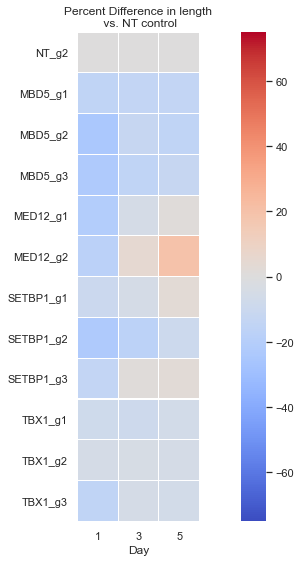

In [70]:
fig, ax = plt.subplots(figsize=(15,9))
neuriteheatmap = sns.heatmap(data=pct_diff, vmin=-75, vmax=75, linewidths=0.1, center=0, 
                             cmap='coolwarm', square=True).set(ylabel=None, 
                                                               xlabel='Day',
                                                               title='Percent Difference in length\n vs. NT control')
plt.savefig('Plate006NeuriteHeatmap.png', bbox_inches='tight')

In [71]:
subset = full_df[full_df['Gene'].isin(['NT', 'MBD5'])]
subset['FullName'] = subset['Gene'] + '_' + subset['grna']

<ipython-input-71-851f58a4c92a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['FullName'] = subset['Gene'] + '_' + subset['grna']


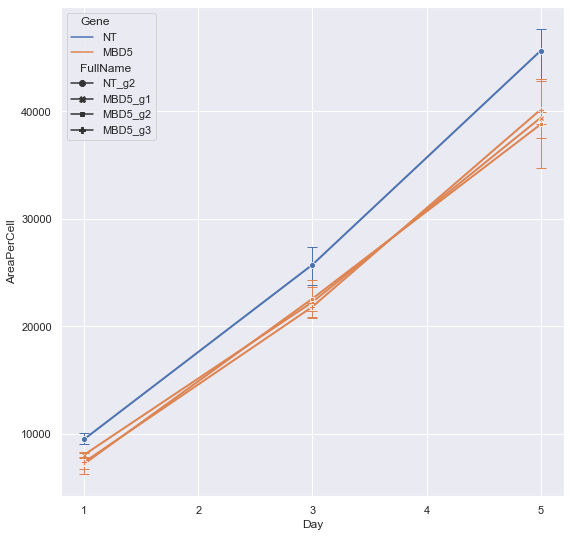

In [72]:
fig, ax = plt.subplots(figsize=(9,9))
mbd = sns.lineplot(data=subset, x='Day', y='AreaPerCell', style='FullName', hue='Gene', markers=True, dashes=False,
            err_style='bars', err_kws={'capsize':5, 'elinewidth':1, 'capthick': 1}, linewidth=2)
plt.xticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5])
plt.savefig('Plate006NTvsMBD5.png', bbox_inches='tight')

In [73]:
subset_tbx = full_df[full_df['Gene'].isin(['NT', 'TBX1'])]
subset_tbx['FullName'] = subset_tbx['Gene'] + '_' + subset_tbx['grna']

<ipython-input-73-080c8f0546c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_tbx['FullName'] = subset_tbx['Gene'] + '_' + subset_tbx['grna']


([<matplotlib.axis.XTick at 0x7fcd5c023070>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

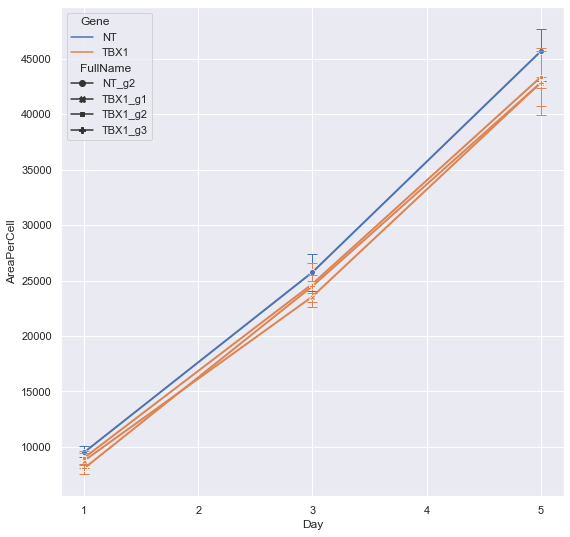

In [74]:
fig, ax = plt.subplots(figsize=(9,9))
mbd = sns.lineplot(data=subset_tbx, x='Day', y='AreaPerCell', style='FullName', hue='Gene', markers=True, dashes=False,
            err_style='bars', err_kws={'capsize':5, 'elinewidth':1, 'capthick': 1}, linewidth=2)
plt.xticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5])

In [75]:
trunkspivot_table = pd.pivot_table(data=df_averaged, values='AvgTrunks', index='FullName', columns='Day')
trunkspivot_table

Day,1,3,5
FullName,,,
MBD5_g1,3.879959,3.503700,4.017839
MBD5_g2,3.852985,3.250211,3.253089
MBD5_g3,3.967810,3.581208,4.052631
MED12_g1,3.669996,3.475010,3.712854
MED12_g2,3.468140,3.217662,3.608243
NT_g2,3.561919,3.015311,3.383759
SETBP1_g1,3.618584,3.315995,3.549117
SETBP1_g2,3.835924,3.573563,3.885161
SETBP1_g3,3.807004,3.445950,3.470041


In [76]:
trunkspivot_table = trunkspivot_table.reindex(index=['NT_g2', 'MBD5_g1', 'MBD5_g2', 'MBD5_g3', 'MED12_g1', 'MED12_g2',
                               'SETBP1_g1', 'SETBP1_g2', 'SETBP1_g3', 'TBX1_g1', 'TBX1_g2', 'TBX1_g3'])
trunkspivot_table

Day,1,3,5
FullName,,,
NT_g2,3.561919,3.015311,3.383759
MBD5_g1,3.879959,3.503700,4.017839
MBD5_g2,3.852985,3.250211,3.253089
MBD5_g3,3.967810,3.581208,4.052631
MED12_g1,3.669996,3.475010,3.712854
MED12_g2,3.468140,3.217662,3.608243
SETBP1_g1,3.618584,3.315995,3.549117
SETBP1_g2,3.835924,3.573563,3.885161
SETBP1_g3,3.807004,3.445950,3.470041


In [77]:
pct_diff_trunk0 = trunkspivot_table.sub(trunkspivot_table.iloc[0,:], axis=1)
pct_diff_trunk1 = pct_diff_trunk0.div(trunkspivot_table.iloc[0,:], axis=1)
pct_diff_trunk = pct_diff_trunk1 * 100
pct_diff_trunk

Day,1,3,5
FullName,,,
NT_g2,0.000000,0.000000,0.000000
MBD5_g1,8.928909,16.196951,18.738934
MBD5_g2,8.171619,7.790225,-3.861677
MBD5_g3,11.395298,18.767439,19.767132
MED12_g1,3.034243,15.245478,9.725736
MED12_g2,-2.632816,6.710772,6.634176
SETBP1_g1,1.590872,9.971884,4.886840
SETBP1_g2,7.692635,18.513908,14.817907
SETBP1_g3,6.880717,14.281714,2.549909


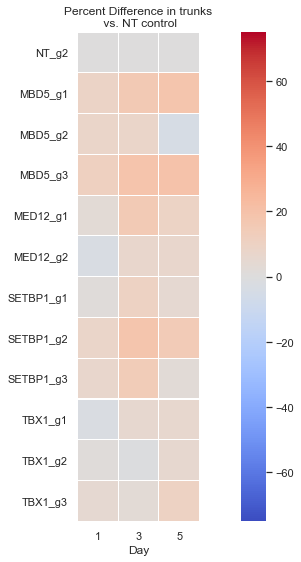

In [78]:
fig, ax = plt.subplots(figsize=(15,9))
trunkheatmap = sns.heatmap(data=pct_diff_trunk, vmin=-75, vmax=75, linewidths=0.1, center=0, 
                           cmap='coolwarm', square=True).set(ylabel=None, 
                                                             xlabel='Day',
                                                             title='Percent Difference in trunks\n vs. NT control')
plt.savefig('Plate006TrunkHeatmap.png', bbox_inches='tight')

<ipython-input-79-8c35ddf6fa64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_trunk['FullName'] = subset_trunk['Gene'] + '_' + subset_trunk['grna']


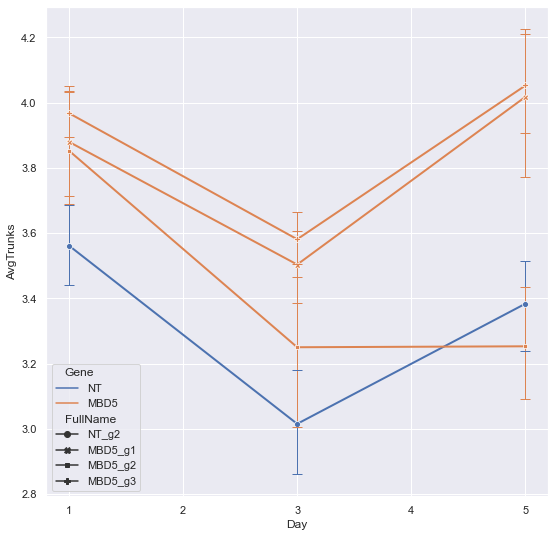

In [79]:
subset_trunk = full_df[full_df['Gene'].isin(['NT', 'MBD5'])]
subset_trunk['FullName'] = subset_trunk['Gene'] + '_' + subset_trunk['grna']

fig, ax = plt.subplots(figsize=(9,9))
mbd = sns.lineplot(data=subset_trunk, x='Day', y='AvgTrunks', style='FullName', hue='Gene', markers=True, dashes=False,
            err_style='bars', err_kws={'capsize':5, 'elinewidth':1, 'capthick': 1}, linewidth=2)
plt.xticks(ticks=[1,2,3,4,5], labels=[1,2,3,4,5])
plt.savefig('Plate006NTvsMBD5Trunks.png', bbox_inches='tight')